I made the first logistic regression run, with 46% accuracy

In [1]:
# Step 0: Import Libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
#Step 1: Explore Data
df_path = r'C:\Users\MadiL\CodeBase\VoxCroft\demo.csv' #The r is here because I use Windows and our paths use backslashes
df = pd.read_csv(df_path)

# Dropping columns that directly imply true or false
df = df.drop(columns=['Probability Score_y', 'Best Name_y'])

print(df.columns)
print(df.dtypes)
print(df.describe())


Index(['Unnamed: 0', 'Article_Date_Published', 'Article_Body', 'Name',
       'Identity_Type', 'Article_Source', 'Voice', 'Article_Themes_AI_Model',
       'Article_Subject_Keyword_Identified',
       'Article_Topic_Keyword_Identified', 'Position', 'Article', 'Frequency',
       'Cluster', 'Inter Frequency', 'Topic Key',
       'Article_Contains_Part_of_Score', 'Dataset_Contains_Part_of_Score',
       'Mapped_Name', 'is_true', 'Alternate_Names', 'Wikidata_ID'],
      dtype='object')
Unnamed: 0                              int64
Article_Date_Published                 object
Article_Body                           object
Name                                   object
Identity_Type                          object
Article_Source                         object
Voice                                  object
Article_Themes_AI_Model                object
Article_Subject_Keyword_Identified     object
Article_Topic_Keyword_Identified       object
Position                               object
Articl

In [22]:
#Step 2: MadiMations

TN = 'is_true' #TN is the column name of your target
FN = [col for col in df.columns if col != TN and df[col].dtype in [np.float64, np.int64]]  #FN is the list of column names of your features
#Alternate syntax: FN = df.columns.drop(TN)
#Or, if you don't want to use all non-target columns, list them manually idk

In [23]:
# Step 3: Preprocess Data
df_clean = df.dropna()
scaler = StandardScaler()

X = scaler.fit_transform(df_clean[FN]) 
y = df_clean[TN]


In [24]:
# Step 4: Train-Test Split
# Adjust the test size and random state as needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Step 5: Train Model
model = LogisticRegression(class_weight='balanced', penalty='l2', max_iter=200)  # Modify as needed for regularization and iteration limit
model.fit(X_train, y_train)



LogisticRegression(class_weight='balanced', max_iter=200)

In [26]:
# Step 6: Model Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

In [27]:
# Step 7: Evaluate Model
# Multiple metrics for comprehensive evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_prob)
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}\nROC AUC: {roc_auc}")

Accuracy: 0.4219269102990033
Precision: 0.49406159682080925
Recall: 0.41114864864864864
F1 Score: 0.30604727581089675
ROC AUC: 0.5466216216216216


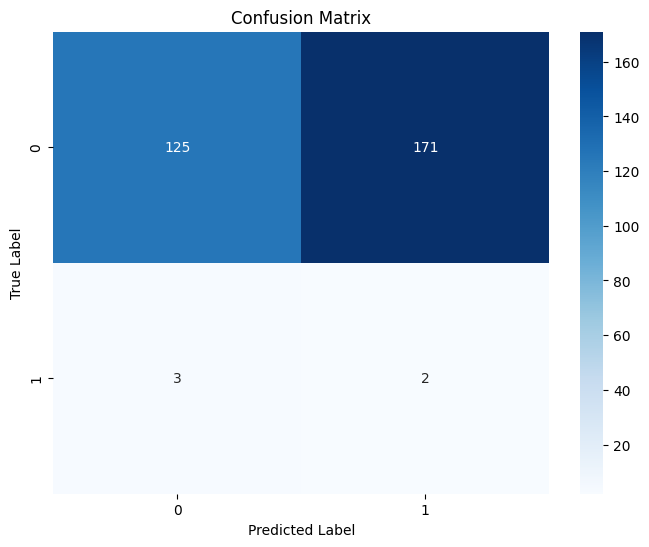

In [28]:
# Step 8: Confusion Matrix Visualization
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

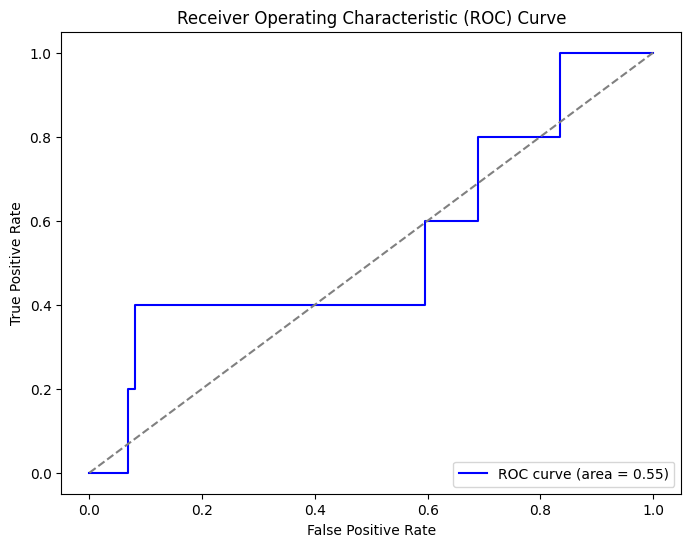

In [29]:
# Step 9: ROC Curve Visualization
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [30]:
# Optional: Cross-Validation for Model Stability
cv_auc = cross_val_score(model, X, y, scoring="roc_auc", cv=5)
print(f'Cross-validated AUC: {cv_auc.mean()}')

Cross-validated AUC: 0.6101334361122881
